Looks like there are 7 different readout powers: 41 to 23 in steps of 3. The first three sweep+stream pairs are taken at the lowest readout power:
- coarse sweep with source off, modulated stream at these resonances
- fine sweep with source off, source-off stream at these resonances
- coarse sweep with source on, modulated stream at these resonances


In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.legacy import read
from kid_readout.measurement.io import readoutnc
from kid_readout.measurement import plot_basic

In [3]:
data_directory = '/data/readout/'

nc_broadband = ['2015-05-12_113832_mmw_noise_broadband.nc',  # 9.0
                '2015-05-12_120435_mmw_noise_broadband.nc',  # 8.5
                '2015-05-12_123322_mmw_noise_broadband.nc',  # 8.0
                '2015-05-12_133122_mmw_noise_broadband.nc',  # 7.5
                '2015-05-12_140235_mmw_noise_broadband.nc',  # 7.0
                '2015-05-12_192735_mmw_noise_broadband.nc',  # 6.5
                '2015-05-12_195908_mmw_noise_broadband.nc',  # 6.0
                '2015-05-12_203101_mmw_noise_broadband.nc',  # 5.5
                '2015-05-13_102207_mmw_noise_broadband.nc',  # 5.0
                '2015-05-13_113833_mmw_noise_broadband.nc',  # 4.5
                '2015-05-13_123152_mmw_noise_broadband.nc',  # 4.0
                '2015-05-13_151154_mmw_noise_broadband.nc',  # 3.5
                '2015-05-13_154402_mmw_noise_broadband.nc',  # 3.0
               ]


In [4]:
nc_index = 4
measurement_index = 0
rnc = readoutnc.ReadoutNetCDF(data_directory + nc_broadband[nc_index])
ssa = read.sweepstreamarray_from_rnc(rnc=rnc,
                                     sweep_group_index=measurement_index,
                                     timestream_group_index=measurement_index)

In [5]:
ssa.num_channels

16

In [6]:
# Channel 8 at 164 MHz was used for the APL paper
channel = 8
sss = ssa[channel]

In [7]:
ssa.stream_array.roach_state

StateDict({'boffile': u'bb2xpfb14mcr17b_2015_Apr_21_1159.bof', 'modulation_output': 7, 'modulation_rate': 2, 'stream_sample_rate': 15625.0, 'num_tone_samples': 524288, 'bank': None, 'num_filterbank_channels': 16384, 'adc_sample_rate': 512000000.0, 'hardware_state_epoch': 1431454021.822896, 'dac_sample_rate': 512000000.0, 'hardware_state_index': 1, 'waveform_normalization': 5.082730245968987e-05, 'num_tones': 16, 'heterodyne': False, 'adc_attenuation': 31.5, 'dac_attenuation': 41.0})

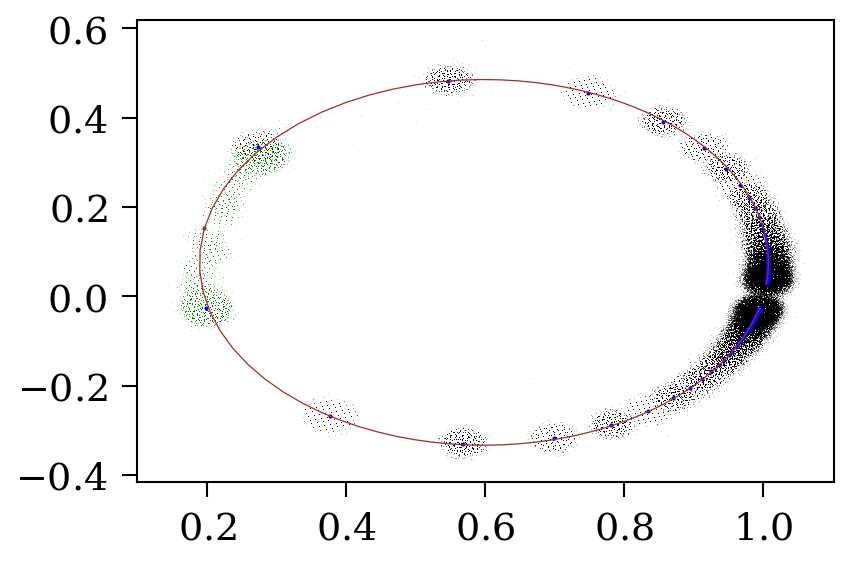

In [8]:
fig, ax = plt.subplots()
plot_basic.sss_complex_plane(sss=sss, axis=ax, normalize=True)

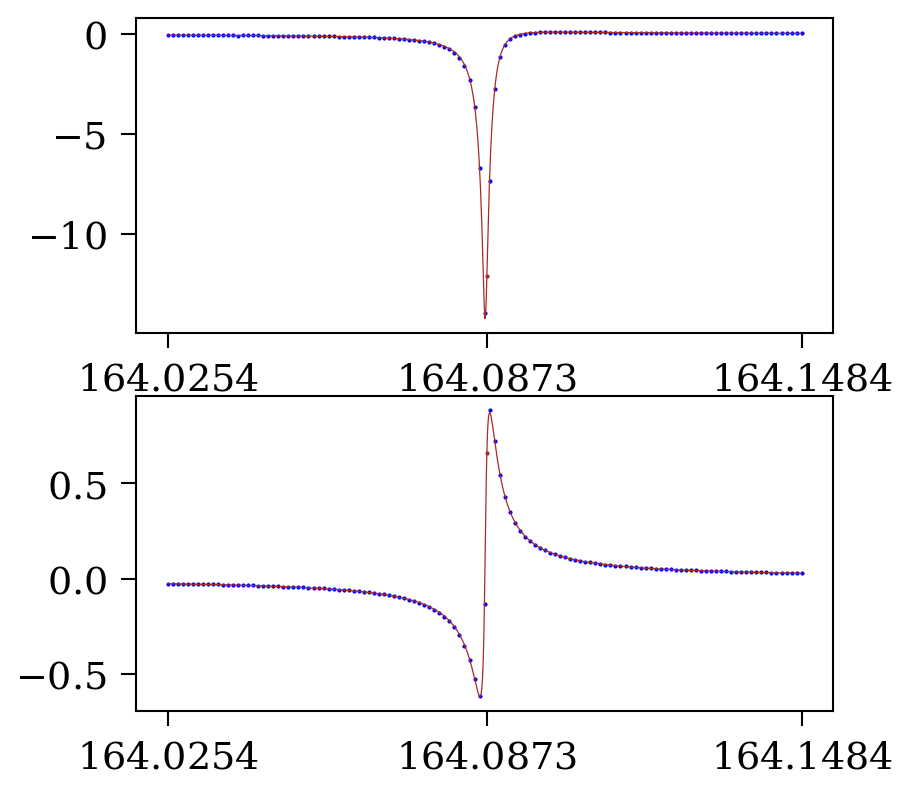

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(3, 3))
plot_basic.resonator_amplitude(axis=axes[0], resonator=sss.resonator, normalize=True)
plot_basic.resonator_phase(axis=axes[1], resonator=sss.resonator, normalize=True);

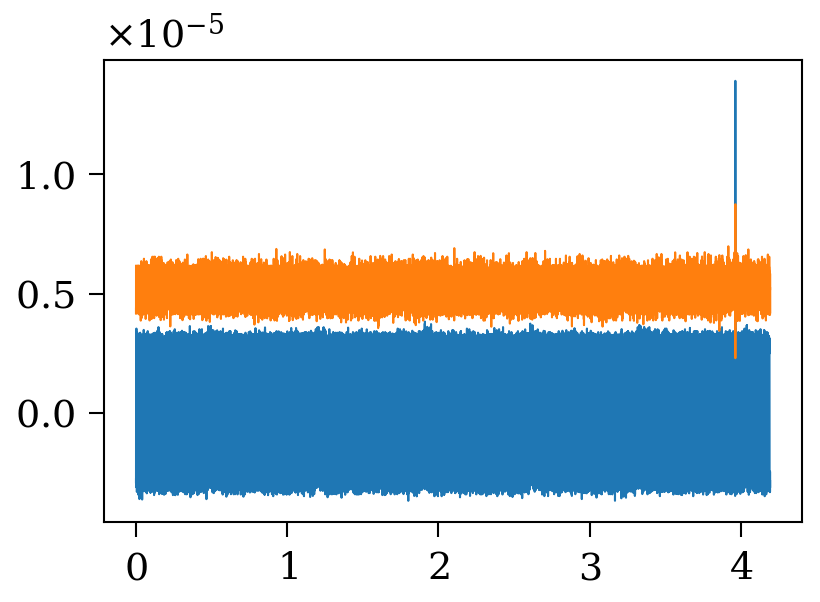

In [13]:
#offset = 0.001
fig, ax = plt.subplots()
ax.plot(sss.stream.sample_time, sss.x_raw, '-')
ax.plot(sss.stream.sample_time, sss.q_raw, '-')
#ax.set_ylim(0, 6e-5)

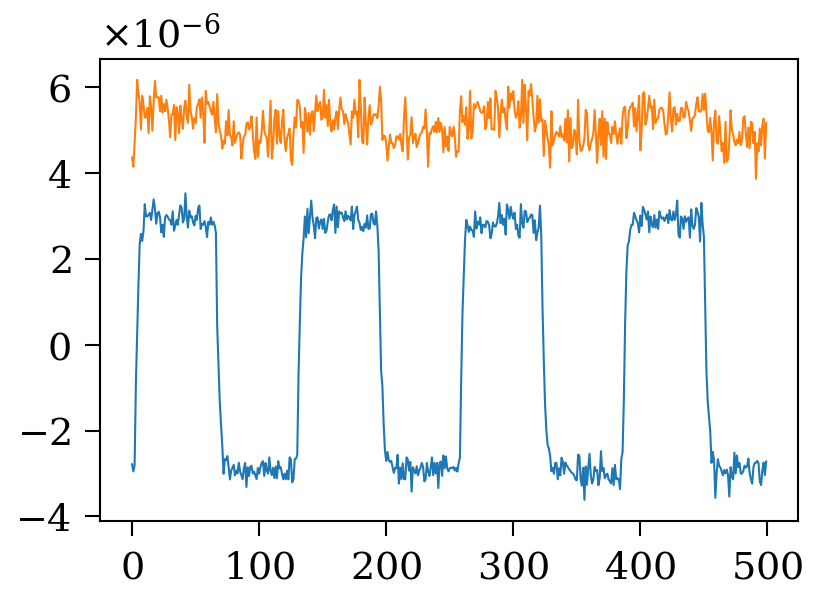

In [14]:
fig, ax = plt.subplots()
ax.plot(sss.x[:500])
ax.plot(sss.q[:500])

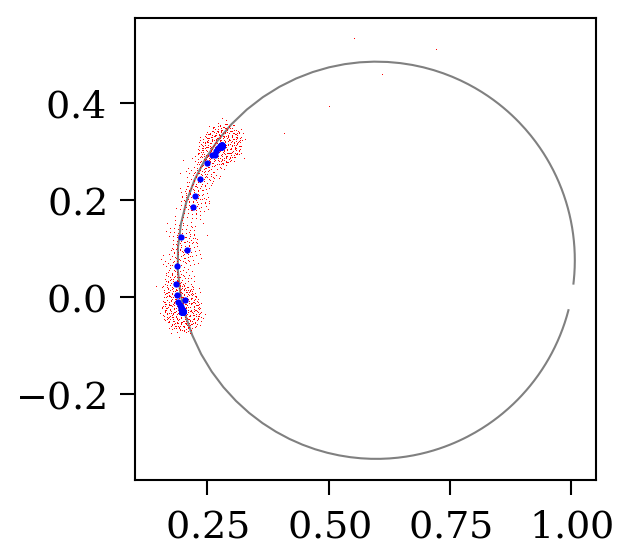

In [15]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
rd = sss.resonator.extract(normalize=True)
folded = sss.resonator.remove_background(s21_raw=sss.stream.fold(sss.stream.s21_raw, period_samples=2**7),
                                          frequency=sss.stream.frequency)
ax.plot(rd.s21_model.real, rd.s21_model.imag, color='gray')
s21 = sss.resonator.remove_background(s21_raw=sss.stream.s21_raw, frequency=sss.stream.frequency)
ax.plot(s21.real, s21.imag, ',r')
ax.plot(folded.real, folded.imag, '.b')

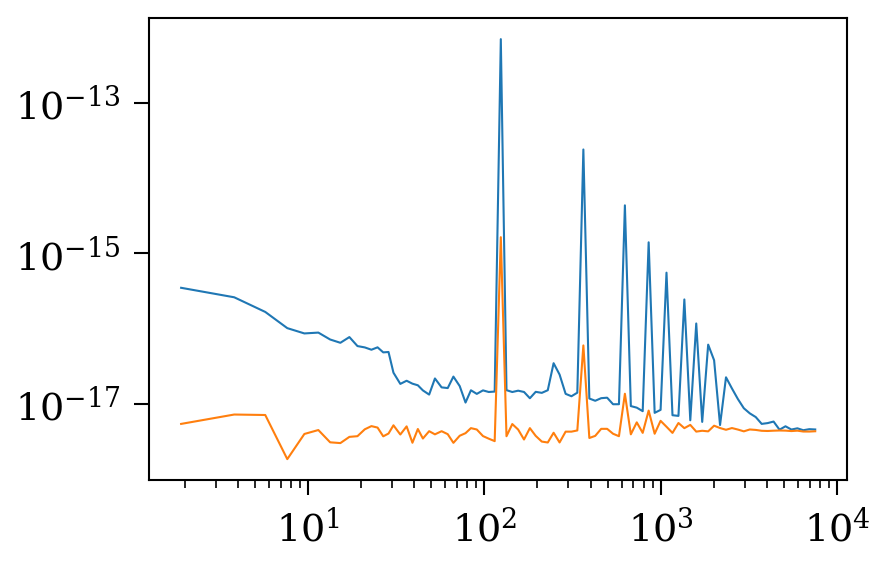

In [16]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(sss.S_frequency, sss.S_xx)
ax.plot(sss.S_frequency, sss.S_yy)

In [19]:
hit = sss.epochs(start=sss.stream.epoch + 19.175, stop=sss8.stream.epoch + 19.185)

fig, ax = plt.subplots()
ax.plot(hit.stream.sample_time, hit.x_raw, '-')
ax.plot(hit.stream.sample_time, hit.q_raw, '-')
#ax.set_ylim(0, 6e-5)

IndexError: index 65536 is out of bounds for axis 0 with size 65536